# **Python Data Analytics by Wes Mckinney**

## **Python Tools**

In [145]:
# Built in date and time functions

from datetime import datetime, date, time

dt = datetime(2025, 5, 26, 20, 30, 21)

print(f'Day: {dt.day}')
print(f'Month: {dt.month}')
print(f'Year: {dt.year}')
print(f'Hour: {dt.hour}')
print(f'Minute: {dt.minute}')
print(f'Second: {dt.second}')

Day: 26
Month: 5
Year: 2025
Hour: 20
Minute: 30
Second: 21


In [146]:
print(f'Date: {dt.date()}')
print(f'Time: {dt.time()}')

Date: 2025-05-26
Time: 20:30:21


In [147]:
# Strings can be converted (parsed) into datetime with strptime function
print(f'Date: {datetime.strptime("20251031", "%Y%m%d")}')

Date: 2025-10-31 00:00:00


In [148]:
# Replacing min and sec field with 0 when aggregating
dt_hour = dt.replace(minute=0, second=0)
dt_hour

datetime.datetime(2025, 5, 26, 20, 0)

In [149]:
# Finding the difference between two dates
dt2 = datetime(2025, 5, 30, 22, 30)
delta = dt2 - dt
delta

datetime.timedelta(days=4, seconds=7179)

In [150]:
# Sorting in place
a = ["Banana","Date", "Elderberry", "Apple", "Cherry" ]
a.sort()
print(a)

['Apple', 'Banana', 'Cherry', 'Date', 'Elderberry']


In [151]:
b = ['He', 'saw', 'six', 'small', 'foxes']
b.sort(key=len)
print(b)
# Sorted will create a copy and will keep original as is

['He', 'saw', 'six', 'small', 'foxes']


In [152]:
# Flatten
some_tuples = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]

flattened = [x for tup in some_tuples for x in tup]

flattened

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [153]:
# Functions
states = ["   Al?aba#ma ", "Geo$rgia!", "Geo^rgia", "geo&rgia",
           "FlOrIda", "sou@th!   carolina##", "West virg**inia?"]
import re

def clean_strings(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub("[!@#?^$&*]", "", value)
        value = value.title()
        result.append(value)
    return result

clean_strings(states)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South   Carolina',
 'West Virginia']

In [154]:
# suppose you wanted to sort a collection of strings by the number of
# distinct letters in each string”

strings = ["foo", "card", "bar", "aaaa", "abab"]
strings.sort(key=lambda x: len(set(x)))
strings

['aaaa', 'foo', 'abab', 'bar', 'card']

In [155]:
"""
A generator is a convenient way,similar to writing a normal function,
to construct a new iterable object. Whereas normal functions execute
and return a single result at a time, generators can return a sequence
of multiple values by pausing and resuming execution each time the
generator is used.  To create a generator, use the yield keyword
instead of return in a function
"""
def squares(n=10):
    print(f"Generating squares from 1 to {n ** 2}")
    for i in range(1, n + 1):
        yield i ** 2
gen = squares()
gen

<generator object squares at 0x7ff29b31d1c0>

In [156]:
for x in gen:
 print(x, end=" ")

Generating squares from 1 to 100
1 4 9 16 25 36 49 64 81 100 

In [157]:
sum(x ** 2 for x in range(100))

328350

In [158]:
dict((i, i ** 2) for i in range(5))

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}

In [159]:
# Iter tools - has collection of generators
import itertools
first_letter = lambda x: x[0]
names = ["Alan", "Adam", "Wes", "Will", "Albert", "Steven"]
for letter, names in itertools.groupby(names, first_letter):
    print(letter, list(names)) # names is a generator

A ['Alan', 'Adam']
W ['Wes', 'Will']
A ['Albert']
S ['Steven']


## Some useful itertools

**chain(*iterables)**: Generates a sequence by chaining iterators
together. Once elements from the first iterator are exhausted, elements
from the next iterator are returned, and so on.

**combinations(iterable, k)**: Generates a sequence of all possible k-tuples of elements in the iterable, ignoring order and without replacement .

**permutations(iterable, k)** : Generates a sequence of all possible k-tuples of elements in the iterable, respecting order.

**groupby(iterable[, keyfunc])** : Generates (key, sub-iterator) for each unique key.

**product(*iterables, repeat=1)**: Generates the Cartesian product of the input iterables as tuples, similar to a nested for loop.”


# **Numpy**

In [160]:
import numpy as np

data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [161]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [162]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [163]:
print(f"Shape: {data.shape}")
print(f"Dimension: {data.ndim}")
print(f"Type: {data.dtype}")

Shape: (2, 3)
Dimension: 2
Type: float64


In [164]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [165]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [166]:
# “It’s not safe to assume that numpy.empty will return an array of all zeros
np.empty((2,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [167]:
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [168]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [169]:
# numpy.arange is an array-valued version of the built-in Python range
np.arange(15)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [170]:
# You can explicitly convert or cast an array from one data type
# to another using ndarray’s astype method
arr = np.array([1,2,3,4,5])
print(arr)
print(arr.dtype)
floar_arr = arr.astype(np.float64)
print(floar_arr)
print(floar_arr.dtype)

[1 2 3 4 5]
int64
[1. 2. 3. 4. 5.]
float64


## Indexing

In [171]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [172]:
arr[5]

np.int64(5)

In [173]:
arr[5:8]

array([5, 6, 7])

In [174]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [175]:
arr2d[2]

array([7, 8, 9])

In [176]:
arr2d[0,2] # same as arr2d[0][2]

np.int64(3)

In [177]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)
print(arr3d.shape)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
(2, 2, 3)


In the above example
shape[0] tells you how many "matrices" or "slices" there are.
[[ 1 2 3] [ 4 5 6]]
[[ 7 8 9] [10 11 12]]

shape[1] tells you how many "rows" are in each of those "matrices."
[ 1 2 3]
[ 4 5 6]

shape[2] tells you how many "columns" or elements are in each "row."
[ 1 2 3] has 3 elements.
[ 4 5 6] has 3 elements.

For an array with shape (A, B, C):

A is the length of the first axis (axis 0).
In a 3D context, you can think of this as the number of "slabs" or "matrices."

B is the length of the second axis (axis 1). In a 3D context,
you can think of this as the number of "rows" within each "slab/matrix."

C is the length of the third axis (axis 2). In a 3D context,
you can think of this as the number of "columns" or elements within each "row."

So, while your "dimension, row, column" is a practical way to visualize it for
3D, it's important to remember that:

"Dimension" is the number of axes (e.g., a 3D array has 3 dimensions/axes).
"Rows" and "Columns" are common terms for the last two axes in 2D arrays
(axis 0 and axis 1, respectively). For higher dimensions, it becomes more
abstract, and using "axis N" is more precise.


In [178]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [179]:
arr3d[0,1]

array([4, 5, 6])

In [180]:
arr3d[1,0]

array([7, 8, 9])

In [181]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [182]:
arr2d[:1] # from oth row and not including row 1

array([[1, 2, 3]])

In [183]:
arr2d[:2] # from row 0 to 1 and not inclduing row 2

array([[1, 2, 3],
       [4, 5, 6]])

In [184]:
arr2d[:2,:1] # rows 0 and 1 : columns o

array([[1],
       [4]])

## Boolean Indexing

In [185]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],[-12, -4], [3, 4]])
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[  4   7]
 [  0   2]
 [ -5   6]
 [  0   0]
 [  1   2]
 [-12  -4]
 [  3   4]]


In [186]:
"""
“Suppose each name corresponds to a row in the data array and we wanted to
select all the rows with the corresponding name "Bob". Like arithmetic
operations, comparisons (such as ==) with arrays are also vectorized.
Thus, comparing names with the string "Bob" yields a Boolean array
"""
names == "Bob"


array([ True, False, False,  True, False, False, False])

In [187]:
data[names == 'Bob']

array([[4, 7],
       [0, 0]])

In [188]:
data[names == 'Bob', 1:]

array([[7],
       [0]])

In [189]:
data[names != 'Bob']

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [190]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [191]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [192]:
mask = (names == "Bob") | (names == "Will")
mask

array([ True, False,  True,  True,  True, False, False])

In [193]:
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

In [194]:
# To set all of the negative values in data to 0
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

## Fancy Indexing

In [195]:
# Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays.
arr = np.zeros((8, 4))

for i in range(8):
  arr[i] = i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [196]:
arr[[4,3,0,6]] # choooses row 4, 3, 0 and 6

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [197]:

#array([[0., 0., 0., 0.],   # Index 0 (or -8)
       #[1., 1., 1., 1.],   # Index 1 (or -7)
       #[2., 2., 2., 2.],   # Index 2 (or -6)
       #[3., 3., 3., 3.],   # Index 3 (or -5)
       #[4., 4., 4., 4.],   # Index 4 (or -4)
       #[5., 5., 5., 5.],   # Index 5 (or -3)
       #[6., 6., 6., 6.],   # Index 6 (or -2)
       #[7., 7., 7., 7.]])  # Index 7 (or -1)


In [198]:
# Using negative indeces chooses code from below
arr[[-1,-2,-3,-8]]


array([[7., 7., 7., 7.],
       [6., 6., 6., 6.],
       [5., 5., 5., 5.],
       [0., 0., 0., 0.]])

In [199]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [200]:
# fancy indexing
arr[[1, 5, 7, 2], [0, 3, 1, 2]]
# “Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected

array([ 4, 23, 29, 10])

In [201]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [202]:
"""
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

Breakdown:
[[ 0,  1,  2,  3],  # row 0
 [ 4,  5,  6,  7],  # row 1
 [ 8,  9, 10, 11],  # row 2
 [12, 13, 14, 15],  # row 3
 [16, 17, 18, 19],  # row 4
 [20, 21, 22, 23],  # row 5
 [24, 25, 26, 27],  # row 6
 [28, 29, 30, 31]]  # row 7

 temp_arr = array([[ 4,  5,  6,  7],   # Row 1 from original arr
                  [20, 21, 22, 23],  # Row 5 from original arr
                  [28, 29, 30, 31],  # Row 7 from original arr
                  [ 8,  9, 10, 11]]) # Row 2 from original arr

 the second indexing operation [:, [0, 3, 1, 2]] is applied to temp_arr
 The first part, :, means "select all rows" from temp_arr
 The second part, [0, 3, 1, 2], is fancy indexing for the columns.
 It means "select columns at indices 0, 3, 1, and 2 from each of
 the selected rows, and arrange them in that order.
 """

'\narr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]\n\nBreakdown: \n[[ 0,  1,  2,  3],  # row 0\n [ 4,  5,  6,  7],  # row 1\n [ 8,  9, 10, 11],  # row 2\n [12, 13, 14, 15],  # row 3\n [16, 17, 18, 19],  # row 4\n [20, 21, 22, 23],  # row 5\n [24, 25, 26, 27],  # row 6\n [28, 29, 30, 31]]  # row 7\n\n temp_arr = array([[ 4,  5,  6,  7],   # Row 1 from original arr\n                  [20, 21, 22, 23],  # Row 5 from original arr\n                  [28, 29, 30, 31],  # Row 7 from original arr\n                  [ 8,  9, 10, 11]]) # Row 2 from original arr\n\n the second indexing operation [:, [0, 3, 1, 2]] is applied to temp_arr  \n The first part, :, means "select all rows" from temp_arr\n The second part, [0, 3, 1, 2], is fancy indexing for the columns. \n It means "select columns at indices 0, 3, 1, and 2 from each of \n the selected rows, and arrange them in that order.  \n '

In [203]:
# “Keep in mind that fancy indexing, unlike slicing, always copies the data
# into a new array when assigning the result to a new variable.
# If you assign values with fancy indexing, the indexed values will be modified

arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [204]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [205]:
arr.T # Transpose

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

In [206]:
arr.swapaxes(0,1)

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

In [207]:
np.dot(arr.T, arr)

array([[2240, 2352, 2464, 2576],
       [2352, 2472, 2592, 2712],
       [2464, 2592, 2720, 2848],
       [2576, 2712, 2848, 2984]])

In [208]:
# Another way to do dot product
arr.T @ arr

array([[2240, 2352, 2464, 2576],
       [2352, 2472, 2592, 2712],
       [2464, 2592, 2720, 2848],
       [2576, 2712, 2848, 2984]])

In [209]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

## Random Number Generation

In [210]:
samples = np.random.standard_normal(size=(4,4))
samples

array([[-0.89051092, -0.53342627,  1.17896994, -0.9304507 ],
       [-1.43324978,  1.7909032 ,  0.10826069, -1.51119084],
       [ 0.80911945,  1.49926478, -0.12862454, -2.37520073],
       [ 0.63648896, -1.13169011, -0.46696483, -0.73313675]])

In [211]:
# Other methods in random are Permutation, shuffle, uniform, integers,
# standard_normal, binomail, normal, beta, chisquare, gamma, uniform.
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))
print(data)
print(type(rng))

[[-1.42382504  1.26372846 -0.87066174]
 [-0.25917323 -0.07534331 -0.74088465]]
<class 'numpy.random._generator.Generator'>


In [212]:
arr = np.arange(10)
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [213]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [214]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)
print(x)
print("\n")
print(y)
print("\n")
np.maximum(x, y)

[-1.3677927   0.6488928   0.36105811 -1.95286306  2.34740965  0.96849691
 -0.75938718  0.90219827]


[-0.46695317 -0.06068952  0.78884434 -1.25666813  0.57585751  1.39897899
  1.32229806 -0.29969852]




array([-0.46695317,  0.6488928 ,  0.78884434, -1.25666813,  2.34740965,
        1.39897899,  1.32229806,  0.90219827])

In [215]:
arr = rng.standard_normal(7) * 5
arr

array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

In [216]:
# A ufunc can return multiple arrays. numpy.modf is one example
# math.modf, it returns the fractional and integral parts of a floating-point array”

remainder, whole_part = np.modf(arr)
print(remainder)
print(whole_part)

[ 0.51459671 -0.10791367 -0.7909463   0.24741966 -0.71800536 -0.40843795
  0.62369966]
[ 4. -8. -0.  2. -6. -0.  8.]


In [217]:
# Ufuncs accept an optional out argument that allows them to assign their
# results into an existing array rather than create a new one
print(arr)
out = np.zeros_like(arr)
print(f"out: {out}")

[ 4.51459671 -8.10791367 -0.7909463   2.24741966 -6.71800536 -0.40843795
  8.62369966]
out: [0. 0. 0. 0. 0. 0. 0.]


In [218]:
np.add(arr, 1)

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

In [219]:
np.add(arr, 1, out=out)
# other funcions abs, fabs, sqrt, exp, square, sign, ceil, floor, modf, cos,tan
# logical_not, arccos, arcsin, isnan,..

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

In [220]:
out

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

## Array Oriented Programming with Arrays

In [221]:
points = np.arange(-5, 5, 0.1) # 100 equally spaced points
points

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [222]:
xs, ys = np.meshgrid(points, points)
print(xs)
print("\n")
print('-'*40)
print("\n")
print(ys)

[[-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 ...
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]]


----------------------------------------


[[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 ...
 [ 4.7  4.7  4.7 ...  4.7  4.7  4.7]
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...  4.9  4.9  4.9]]


In [223]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.00071425, 6.93108938, ..., 6.86221539, 6.93108938,
        7.00071425],
       [7.00071425, 6.92964646, 6.85930026, ..., 6.78969808, 6.85930026,
        6.92964646],
       [6.93108938, 6.85930026, 6.7882251 , ..., 6.71788657, 6.7882251 ,
        6.85930026],
       ...,
       [6.86221539, 6.78969808, 6.71788657, ..., 6.64680374, 6.71788657,
        6.78969808],
       [6.93108938, 6.85930026, 6.7882251 , ..., 6.71788657, 6.7882251 ,
        6.85930026],
       [7.00071425, 6.92964646, 6.85930026, ..., 6.78969808, 6.85930026,
        6.92964646]])

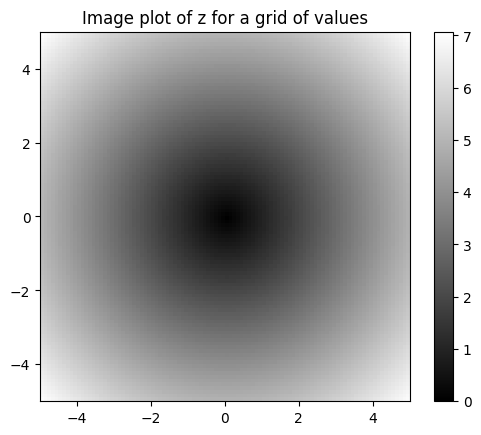

In [224]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.grey, extent = [-5,5,-5,5])
plt.colorbar()
plt.title("Image plot of z for a grid of values")
plt.show()
plt.close("all")

In [225]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result
# chooses x if c:cond is true else chooses y -
# does not work well with multiple arrays so we use np.where

[np.float64(1.1),
 np.float64(2.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(2.5)]

In [226]:
result = np.where(cond, xarr, yarr)
result
# 1st condtion, 2nd and 3rd no need to be arrays, can be scalar.
# This is used to produce a new array of values based on another array.

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [227]:
arr = rng.standard_normal((4, 4))
arr

array([[ 2.61815943,  0.77736134,  0.8286332 , -0.95898831],
       [-1.20938829, -1.41229201,  0.54154683,  0.7519394 ],
       [-0.65876032, -1.22867499,  0.25755777,  0.31290292],
       [-0.13081169,  1.26998312, -0.09296246, -0.06615089]])

In [228]:
arr > 0

array([[ True,  True,  True, False],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [False,  True, False, False]])

In [229]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2, -2],
       [-2, -2,  2,  2],
       [-2, -2,  2,  2],
       [-2,  2, -2, -2]])

In [230]:
array = np.array([-1, 2, -3, 4, 0, -5, 6])

# If arr > 0 is True, take element from arr.
# If arr > 0 is False, take 0.
result = np.where(array > 0, array, 0)
result

array([0, 2, 0, 4, 0, 0, 6])

In [231]:
arr1 = np.array([10, 20, 30, 40, 50])
arr2 = np.array([100, 200, 300, 400, 500])

# If arr1 > 30 is True, take from arr1.
# If arr1 > 30 is False, take from arr2.
result = np.where(arr1 > 30, arr1, arr2)
print(result) # Output: [100 200 300 40 50]

[100 200 300  40  50]


In [232]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# If (arr > 2) AND (arr < 8), take arr, otherwise take 0
result = np.where((arr > 2) & (arr < 8), arr, 0)
print(result) # Output: [0 0 3 4 5 6 7 0 0 0]

[0 0 3 4 5 6 7 0 0 0]


In [233]:
arr = np.array([[1, 5, 2],
                [8, 3, 9],
                [4, 7, 6]])

# Find where elements are greater than 5

indices = np.where(arr > 5)
print(f"indices:{indices}")

# Output: (array([0, 1, 1, 2]), array([1, 0, 2, 1]))

# This means:
# arr[0, 1] is > 5 (value 5) -> (0, 1) in the output
# arr[1, 0] is > 5 (value 8) -> (1, 0) in the output
# arr[1, 2] is > 5 (value 9) -> (1, 2) in the output
# arr[2, 1] is > 5 (value 7) -> (2, 1) in the output

# You can use these indices to get the actual values:
print(arr[indices])

indices:(array([1, 1, 2, 2]), array([0, 2, 1, 2]))
[8 9 7 6]


In [234]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

## Statistical Methods

In [235]:
arr = rng.standard_normal((5, 4))
arr

array([[-1.10821447,  0.13595685,  1.34707776,  0.06114402],
       [ 0.0709146 ,  0.43365454,  0.27748366,  0.53025239],
       [ 0.53672097,  0.61835001, -0.79501746,  0.30003095],
       [-1.60270159,  0.26679883, -1.26162378, -0.07127081],
       [ 0.47404973, -0.41485376,  0.0977165 , -1.64041784]])

In [236]:
print(arr.mean())
print(arr.sum())

-0.08719744457434529
-1.743948891486906


arr.mean(axis=1) : compute
mean across the columns.

where arr.sum(axis=0) : compute
sum down the rows.

In [237]:
arr.mean(axis=1)

array([ 0.10899104,  0.3280763 ,  0.16502112, -0.66719934, -0.37087634])

In [238]:
arr.sum(axis=0)

array([-1.62923076,  1.03990647, -0.33436331, -0.82026129])

In [239]:
# Other methods like cumsum and cumprod do not aggregate, instead
# producing an array of the intermediate results
arr.cumsum()
# arr.cumsum(axis=0) computes the cumulative sum along the rows.
# while arr.cumsum(axis=1) computes the sums along the columns

array([-1.10821447, -0.97225762,  0.37482015,  0.43596417,  0.50687877,
        0.94053331,  1.21801697,  1.74826935,  2.28499032,  2.90334034,
        2.10832288,  2.40835383,  0.80565223,  1.07245106, -0.18917272,
       -0.26044352,  0.21360621, -0.20124755, -0.10353105, -1.74394889])

In [240]:
my_array = np.array([1, 2, 3, 4, 5])

# Cumulative Sum
cumulative_sum_array = my_array.cumsum()
print("Original:", my_array)
print("Cumulative Sum:", cumulative_sum_array)
# Output:
# Original: [1 2 3 4 5]
# Cumulative Sum: [ 1  3  6 10 15]

Original: [1 2 3 4 5]
Cumulative Sum: [ 1  3  6 10 15]


In [241]:
arr = rng.standard_normal(100)
arr

array([-8.57258824e-01,  6.88281788e-01, -1.15452958e+00,  6.50452389e-01,
       -1.38835995e+00, -9.07382457e-01, -1.09542531e+00,  7.14569494e-03,
        5.34359903e-01, -1.06580785e+00, -1.81472740e-01,  1.62195180e+00,
       -3.17391946e-01, -8.15814967e-01,  3.86579017e-01, -2.23638926e-01,
       -7.01690809e-01, -1.79571318e+00,  8.18325622e-01, -5.71032902e-01,
        7.85525063e-04, -1.06364272e+00,  1.30171450e+00,  7.47872942e-01,
        9.80875909e-01, -1.10418688e-01,  4.67918531e-01,  8.90607150e-01,
        1.02300937e+00,  3.12383389e-01, -6.19046857e-02, -3.59479647e-01,
       -7.48643984e-01, -9.65478907e-01,  3.60034657e-01, -2.44552532e-01,
       -1.99585661e+00, -1.55247617e-01,  1.06383087e+00, -2.75171567e-01,
       -1.85333593e+00, -1.24341928e-01,  7.84974522e-01,  2.01998597e-01,
       -4.28074443e-01,  1.84828890e+00,  1.89995289e+00, -9.84250348e-02,
        8.13445440e-01,  3.92494389e-01,  7.81442900e-01,  1.45327152e+00,
        8.20186045e-01,  

In [242]:
(arr > 0).sum() # Number of positive values

np.int64(48)

In [243]:
(arr <= 0).sum() # Number of non-positive values

np.int64(52)

Two additional methods, **any** and
**all**, are useful especially for Boolean
arrays.

**Any** tests whether one or
more values in an array is True.

**All** checks if every value is
True

In [244]:
bools = np.array([False, False, True, False])

In [245]:
bools.any()

np.True_

In [246]:
bools.all()

np.False_

In [247]:
arr = rng.standard_normal(6)
arr

array([ 0.07726066, -0.68391322, -0.72083767,  1.12062282, -0.05481416,
       -0.08241372])

In [248]:
arr.sort() # sorts inplace
arr

array([-0.72083767, -0.68391322, -0.08241372, -0.05481416,  0.07726066,
        1.12062282])

In [249]:
arr = rng.standard_normal((5, 3))
arr

array([[ 0.9359865 ,  1.23853712,  1.27279553],
       [ 0.40589222, -0.05032522,  0.28931754],
       [ 0.17930568,  1.39748056,  0.29204679],
       [ 0.63840567, -0.02788771,  1.37105185],
       [-2.05280763,  0.38050908,  0.75539067]])

In [250]:
arr.sort(axis=0)
arr

array([[-2.05280763, -0.05032522,  0.28931754],
       [ 0.17930568, -0.02788771,  0.29204679],
       [ 0.40589222,  0.38050908,  0.75539067],
       [ 0.63840567,  1.23853712,  1.27279553],
       [ 0.9359865 ,  1.39748056,  1.37105185]])

In [251]:
 arr.sort(axis=1)
 arr

array([[-2.05280763, -0.05032522,  0.28931754],
       [-0.02788771,  0.17930568,  0.29204679],
       [ 0.38050908,  0.40589222,  0.75539067],
       [ 0.63840567,  1.23853712,  1.27279553],
       [ 0.9359865 ,  1.37105185,  1.39748056]])

In [252]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names) # shows in sorted order and works like a python 'set'

array(['Bob', 'Joe', 'Will'], dtype='<U4')

“**numpy.save **and **numpy.load** are the two workhorse functions for efficiently saving and loading array data on disk.”

In [253]:
arr = np.arange(10)
np.save("some_array", arr)

In [254]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Linear Algebra

In [255]:
from numpy.linalg import inv, qr
X = rng.standard_normal((5, 5))
mat = X.T @ X
mat


array([[ 6.63732514, -2.12482716, -0.41721791,  0.4141581 , -1.74958717],
       [-2.12482716,  5.34294773, -0.06468282, -0.38396683, -3.10408173],
       [-0.41721791, -0.06468282,  2.34761515,  0.73648716,  1.20596393],
       [ 0.4141581 , -0.38396683,  0.73648716,  0.55469981,  1.38090681],
       [-1.74958717, -3.10408173,  1.20596393,  1.38090681,  7.4832719 ]])

In [256]:
inv(mat) # inverse

array([[  3.49932285,   2.84436268,   3.59557002, -16.55376878,
          4.47325573],
       [  2.84436268,   2.56666253,   2.9001963 , -13.57742   ,
          3.76776505],
       [  3.59557002,   2.9001963 ,   4.48232906, -18.34525499,
          4.70660032],
       [-16.55376878, -13.57742   , -18.34525499,  84.01018808,
        -22.04840478],
       [  4.47325573,   3.76776505,   4.70660032, -22.04840478,
          6.05251342]])

In [257]:
mat @ inv(mat)
# other commonly used functions: diag, dot, trace, det, inv, eig, pinv, svd
# solve, lstsq (least squares solution)

array([[ 1.00000000e+00,  1.75067964e-15, -2.80207584e-15,
         9.86737630e-16, -1.66652414e-15],
       [ 1.65521536e-17,  1.00000000e+00,  6.05561798e-16,
         4.15196154e-15, -2.52119478e-15],
       [ 3.86407015e-16, -7.07260933e-16,  1.00000000e+00,
        -6.75452839e-15, -1.18024337e-15],
       [ 1.82488652e-16, -1.79488644e-17,  2.45759362e-16,
         1.00000000e+00, -8.63545476e-16],
       [ 3.45446591e-16, -1.23954858e-15,  2.22757702e-15,
        -1.91689727e-14,  1.00000000e+00]])

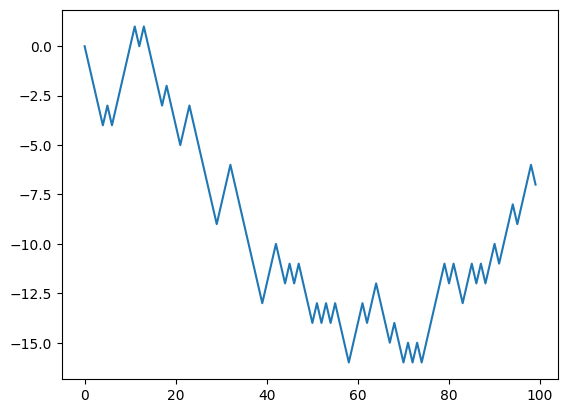

In [258]:
# Random walk simulation
# Random wlak starting at 0 with steps 1 to -1 occuring with equal probability

import random
position = 0 # walk begins at origin
walk = [position] #  Creates a list called walk and adds the initial position (0) to it
nsteps = 1000
for _ in range(nsteps):
  # random.randint(0, 1): Generates either 0 or 1 randomly with equal probability.
  step = 1 if random.randint(0, 1) else -1
  # Updates the current position by adding the step taken. If step was 1,
  # position increases. If step was -1, position decreases.
  position += step
  walk.append(position)

plt.plot(walk[:100])

Boolean array (first few): [False False False False False False False False False False False False
 False False False False False False False False]

--- Random Walk Statistics (Seed: 42) ---
Minimum position reached: -23
Maximum position reached: 19
First time walk crossed +/- 10: at step 115
Position at first crossing: -10


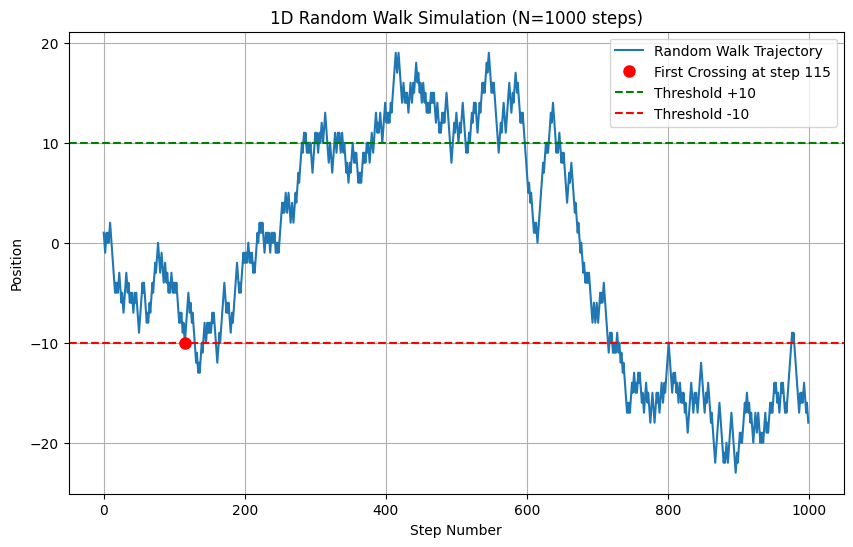

In [259]:
import numpy as np
import matplotlib.pyplot as plt

# --- Random Walk Simulation using NumPy ---
nsteps = 1000  # Number of steps for the walk
seed_value = 42 # For reproducibility, you can change this
rng = np.random.default_rng(seed=seed_value) # Fresh random generator

# Generate random integers (0 or 1) for the steps
# 0 -> +1 step, 1 -> -1 step (can be flipped, just needs consistency)
# Using 0 and 1, then mapping, is a common way to simulate coin flips.
draws = rng.integers(0, 2, size=nsteps)

# Convert draws (0s and 1s) into steps (+1 or -1)
# If draw is 0, step is 1. If draw is 1, step is -1.
steps = np.where(draws == 0, 1, -1)

# Calculate the cumulative sum to get the walk's trajectory
walk = steps.cumsum()

# --- Extracting Statistics ---
min_pos = walk.min()
max_pos = walk.max()

# First crossing time for a specific threshold (e.g., 10 units away)
threshold = 10
# Create a boolean array: True where abs(walk) >= threshold
crossed_threshold = np.abs(walk) >= threshold
print(f"Boolean array (first few): {crossed_threshold[:20]}")

# Find the index of the first True value
# If no True value exists (i.e., walk never crosses threshold), argmax will return 0.
# We'll add a check for this.
if crossed_threshold.any(): # Check if any True values exist
    first_crossing_idx = crossed_threshold.argmax()
    first_crossing_value = walk[first_crossing_idx]
    print(f"\n--- Random Walk Statistics (Seed: {seed_value}) ---")
    print(f"Minimum position reached: {min_pos}")
    print(f"Maximum position reached: {max_pos}")
    print(f"First time walk crossed +/- {threshold}: at step {first_crossing_idx}")
    print(f"Position at first crossing: {first_crossing_value}")
else:
    print(f"\n--- Random Walk Statistics (Seed: {seed_value}) ---")
    print(f"Minimum position reached: {min_pos}")
    print(f"Maximum position reached: {max_pos}")
    print(f"Walk never reached +/- {threshold} within {nsteps} steps.")
    first_crossing_idx = -1 # Indicate it didn't cross

# --- Plotting the Random Walk ---
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
plt.plot(walk, label='Random Walk Trajectory') # Plot the entire walk

# Highlight the first crossing time if it occurred
if first_crossing_idx != -1:
    plt.plot(first_crossing_idx, first_crossing_value, 'ro', markersize=8, label=f'First Crossing at step {first_crossing_idx}')
    # Add a horizontal line at the threshold
    plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold +{threshold}')
    plt.axhline(y=-threshold, color='red', linestyle='--', label=f'Threshold -{threshold}')


plt.title(f'1D Random Walk Simulation (N={nsteps} steps)')
plt.xlabel('Step Number')
plt.ylabel('Position')
plt.grid(True)
plt.legend()
plt.show()

# If you want to close all figures after they are displayed (good for scripts)
plt.close('all')

Shape of 'walks' array (nwalks, nsteps): (5000, 1000)

First 3 steps of the first 5 walks:
[[ 1  0  1]
 [ 1  2  3]
 [ 1  0 -1]
 [ 1  2  3]
 [-1  0 -1]]

--- Global Statistics ---
Overall maximum position reached across all 5000 walks: 114
Overall minimum position reached across all 5000 walks: -120

Boolean array 'hits30' (first 10): [ True False  True  True False False False  True  True  True]
Number of walks that hit +/- 30: 3395 out of 5000
Shape of walks that crossed the threshold: (3395, 1000)
First 10 crossing times: [705 201 491 283 649 339 219 537 915 913]
Average minimum crossing time to +/- 30: 500.62 steps


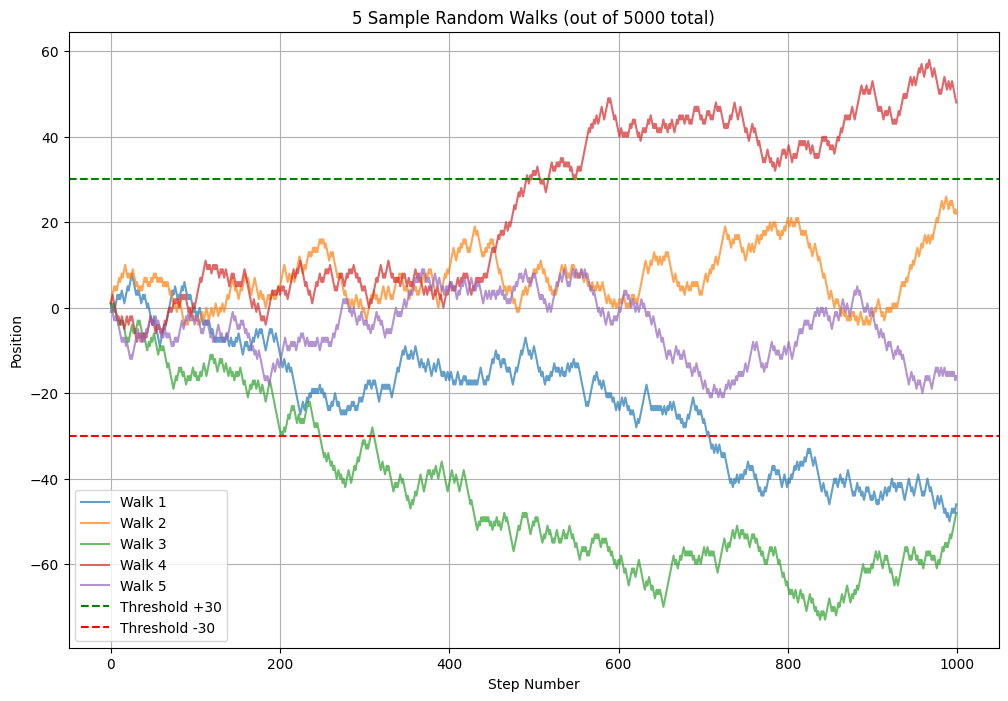

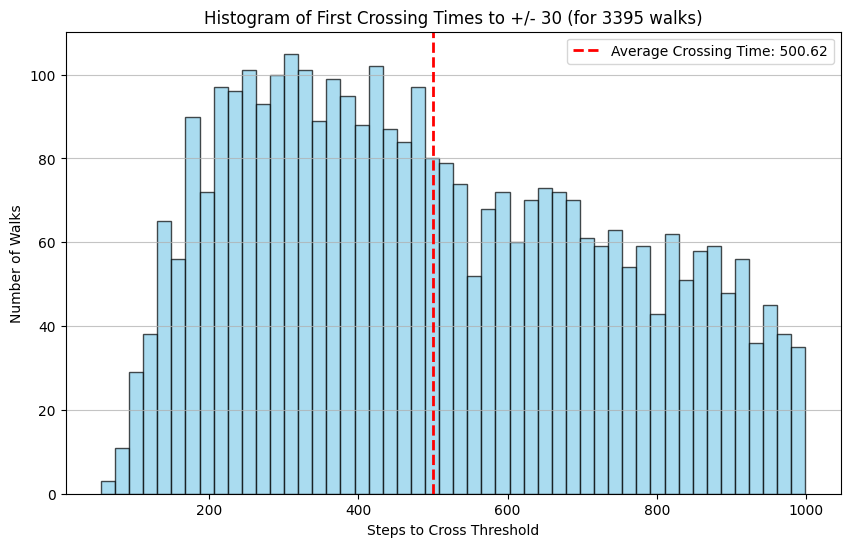

In [260]:
import numpy as np
import matplotlib.pyplot as plt

# --- Setup for Multiple Random Walks ---
nwalks = 5000  # Number of independent random walks to simulate
nsteps = 1000  # Number of steps in each walk

# Initialize a fresh random number generator for reproducibility
rng = np.random.default_rng(seed=12345)

# --- Simulate Multiple Walks ---

# 1. Generate random draws (0 or 1) for all walks at once
# The 'size' argument now creates a 2D array: (nwalks rows, nsteps columns)
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1

# 2. Convert draws (0s and 1s) into steps (+1 or -1)
# np.where works element-wise across the entire 2D 'draws' array
steps = np.where(draws > 0, 1, -1) # If draw > 0 (i.e., 1), step is 1; else (-1)

# 3. Calculate the cumulative sum to get the trajectory for each walk
# The crucial part here is 'axis=1'. This tells cumsum to sum *across the rows*.
# So, each row represents one independent random walk.
walks = steps.cumsum(axis=1)

print("Shape of 'walks' array (nwalks, nsteps):", walks.shape)
print("\nFirst 3 steps of the first 5 walks:")
print(walks[:5, :3]) # Print a slice to see the beginning of a few walks

# --- Extracting Global Statistics ---
# Compute the maximum and minimum values obtained over all of the walks
global_max = walks.max()
global_min = walks.min()

print(f"\n--- Global Statistics ---")
print(f"Overall maximum position reached across all {nwalks} walks: {global_max}")
print(f"Overall minimum position reached across all {nwalks} walks: {global_min}")

# --- First Crossing Time Analysis ---
threshold = 30 # The absolute value threshold for crossing

# 1. Check which walks hit the threshold
# np.abs(walks) >= threshold creates a boolean array of the same shape as 'walks'
# .any(axis=1) checks if *any* True value exists *along each row* (axis 1).
# The result 'hits30' is a 1D boolean array, one value per walk.
hits30 = (np.abs(walks) >= threshold).any(axis=1)

print(f"\nBoolean array 'hits30' (first 10): {hits30[:10]}")
print(f"Number of walks that hit +/- {threshold}: {hits30.sum()} out of {nwalks}")

# 2. Select only the walks that actually hit the threshold
# This uses boolean indexing to filter the 'walks' array
crossing_walks = walks[hits30]
print(f"Shape of walks that crossed the threshold: {crossing_walks.shape}")

# 3. Compute the first crossing time for ONLY those walks that hit the threshold
# (np.abs(crossing_walks) >= threshold) creates the boolean array for these filtered walks
# .argmax(axis=1) finds the *first* index (step number) along each row (axis=1)
# where the condition becomes True.
crossing_times = (np.abs(crossing_walks) >= threshold).argmax(axis=1)

print(f"First 10 crossing times: {crossing_times[:10]}")

# 4. Compute the average minimum crossing time
average_crossing_time = crossing_times.mean()
print(f"Average minimum crossing time to +/- {threshold}: {average_crossing_time:.2f} steps")


# --- Plotting Example Walks ---
plt.figure(figsize=(12, 8))

# Plot a few individual walks to visualize
num_walks_to_plot = 5
for i in range(num_walks_to_plot):
    plt.plot(walks[i], alpha=0.7, label=f'Walk {i+1}')

# Add threshold lines
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold +{threshold}')
plt.axhline(y=-threshold, color='red', linestyle='--', label=f'Threshold -{threshold}')

plt.title(f'{num_walks_to_plot} Sample Random Walks (out of {nwalks} total)')
plt.xlabel('Step Number')
plt.ylabel('Position')
plt.grid(True)
plt.legend()
plt.show()

# --- Plotting Histogram of Crossing Times ---
if hits30.sum() > 0: # Only plot if some walks actually crossed
    plt.figure(figsize=(10, 6))
    plt.hist(crossing_times, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(average_crossing_time, color='red', linestyle='dashed', linewidth=2, label=f'Average Crossing Time: {average_crossing_time:.2f}')
    plt.title(f'Histogram of First Crossing Times to +/- {threshold} (for {hits30.sum()} walks)')
    plt.xlabel('Steps to Cross Threshold')
    plt.ylabel('Number of Walks')
    plt.grid(axis='y', alpha=0.75)
    plt.legend()
    plt.show()
else:
    print(f"\nNo walks crossed the +/- {threshold} threshold, so no histogram of crossing times will be plotted.")

plt.close("all")

# **Pandas**

In [261]:
import pandas as pd

obj = pd.Series([4, 7, -5, 3])
obj

,0
0,4
1,7
2,-5
3,3


In [262]:
obj.array

<NumpyExtensionArray>
[np.int64(4), np.int64(7), np.int64(-5), np.int64(3)]
Length: 4, dtype: int64

In [263]:
obj2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])
obj2

,0
d,4
b,7
a,-5
c,3


In [264]:
obj2["a"]

np.int64(-5)

In [265]:
obj2[["c", "a", "d"]]

,0
c,3
a,-5
d,4


In [266]:
obj2[obj2 > 0]

,0
d,4
b,7
c,3


In [267]:
np.exp(obj2)

,0
d,54.598150
b,1096.633158
a,0.006738
c,20.085537


In [268]:
"b" in obj2

True

In [269]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}

In [270]:
obj3 = pd.Series(sdata)
obj3

,0
Ohio,35000
Texas,71000
Oregon,16000
Utah,5000


In [271]:
obj3.to_dict()

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [272]:
states = ["California", "Ohio", "Oregon", "Texas"]
obj4 = pd.Series(sdata, index=states)
obj4

,0
California,NaN
Ohio,35000.0
Oregon,16000.0
Texas,71000.0


In [273]:
pd.isna(obj4)

,0
California,True
Ohio,False
Oregon,False
Texas,False


In [274]:
obj4.name = "population"
obj4.index.name = "state"
obj4

,population
state,
California,NaN
Ohio,35000.0
Oregon,16000.0
Texas,71000.0


In [275]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [276]:
frame.head(2) # deafualt 5, if left empty

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7


In [277]:
frame.tail(2)

,state,year,pop
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [278]:
pd.DataFrame(data, columns=["year", "state", "pop"])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [279]:
frame2 = pd.DataFrame(data, columns=["year", "state", "pop", "debt"])
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


In [280]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [281]:
frame2["state"]

,state
0,Ohio
1,Ohio
2,Ohio
3,Nevada
4,Nevada
5,Nevada


In [282]:
frame2.year

,year
0,2000
1,2001
2,2002
3,2001
4,2002
5,2003


In [283]:
frame2.loc[1]

,1
year,2001
state,Ohio
pop,1.7
debt,NaN


In [284]:
frame2.iloc[2]

,2
year,2002
state,Ohio
pop,3.6
debt,NaN


In [285]:
frame2["debt"] = 16.5
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,16.5
1,2001,Ohio,1.7,16.5
2,2002,Ohio,3.6,16.5
3,2001,Nevada,2.4,16.5
4,2002,Nevada,2.9,16.5
5,2003,Nevada,3.2,16.5


In [286]:
frame2["debt"] = np.arange(6.)
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,0.0
1,2001,Ohio,1.7,1.0
2,2002,Ohio,3.6,2.0
3,2001,Nevada,2.4,3.0
4,2002,Nevada,2.9,4.0
5,2003,Nevada,3.2,5.0


In [287]:
# DataFrame’s index, inserting missing values in any index values not present
val = pd.Series([-1.2, -1.5, -1.7], index=["two", "four", "five"])
frame2["debt"] = val
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


In [288]:
frame2["eastern"] = frame2["state"] == "Ohio"
frame2

,year,state,pop,debt,eastern
0,2000,Ohio,1.5,NaN,True
1,2001,Ohio,1.7,NaN,True
2,2002,Ohio,3.6,NaN,True
3,2001,Nevada,2.4,NaN,False
4,2002,Nevada,2.9,NaN,False
5,2003,Nevada,3.2,NaN,False


In [289]:
del frame2["eastern"]
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


In [290]:
populations = {"Ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6},
                 "Nevada": {2001: 2.4, 2002: 2.9}}
frame3 = pd.DataFrame(populations)
frame3

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


In [291]:
frame3.T

,2000,2001,2002
Ohio,1.5,1.7,3.6
Nevada,NaN,2.4,2.9


In [292]:
pd.DataFrame(populations, index=[2001, 2002, 2003])

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9
2003,NaN,NaN


In [293]:
frame3.index.name = "year"
frame3.columns.name = "state"
frame3

state,Ohio,Nevada
year,,
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


In [294]:
frame3.to_numpy()

array([[1.5, nan],
       [1.7, 2.4],
       [3.6, 2.9]])

In [295]:
frame3.columns

Index(['Ohio', 'Nevada'], dtype='object', name='state')

In [296]:
 "Ohio" in frame3.columns


True

In [297]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])
obj

,0
d,4.5
b,7.2
a,-5.3
c,3.6


In [298]:
obj2 = obj.reindex(["a", "b", "c", "d", "e"])
obj2

,0
a,-5.3
b,7.2
c,3.6
d,4.5
e,NaN


In [299]:
obj3 = pd.Series(["blue", "purple", "yellow"], index=[0, 2, 4])
obj3

,0
0,blue
2,purple
4,yellow


In [300]:
obj3.reindex(np.arange(6), method="ffill")

,0
0,blue
1,blue
2,purple
3,purple
4,yellow
5,yellow


In [301]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)), index=["a", "c", "d"],
                      columns=["Ohio", "Texas", "California"])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [303]:
frame2 = frame.reindex(index=["a", "b", "c", "d"])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [304]:
states = ["Texas", "Utah", "California"]
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


**Reindexing function arguments**

**labels** - New sequence to use as an index. Can be Index instance or any other sequence-like Python data structure. An Index will be used exactly as is without any copying.

**index** - Use the passed sequence as the new index labels.

**columnsUse** the passed sequence as the new column labels.

**axis** - The axis to reindex, whether "index" (rows) or "columns". The default is
 "index". You can alternately do
reindex(index=new_labels) or
reindex(columns=new_labels).

**method**- Interpolation (fill) method; "ffill" fills forward, while "bfill" fills
backward.

**fill_value** - Substitute value to use when introducing missing data by reindexing. Use
fill_value="missing" (the default behavior) when you want absent labels to have null values in the result.

**limit** - When forward filling or backfilling, the maximum size gap (in number of elements) to fill.

**tolerance** - When forward filling or backfilling, the maximum size gap (in
absolute numeric distance) to fill for inexact matches.

**level** - Match simple Index on level of MultiIndex; otherwise select subset of.

**copy** - If True, always copy underlying data even if the new index is equivalent to the old index; if False, do not copy the data when the indexes are equivalent.



In [305]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [306]:
data.drop(index=["Colorado", "Ohio"])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [307]:
data.drop("two", axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [308]:
obj = pd.Series(np.arange(4.), index=["a", "b", "c", "d"])
obj

,0
a,0.0
b,1.0
c,2.0
d,3.0


In [313]:
# iloc operator that indexes exclusively with integers
obj.iloc[[1, 3]]

,0
b,1.0
d,3.0


In [312]:
# loc operator indexes exclusively with labels

obj.loc[["b", "a", "d"]]

,0
b,1.0
a,0.0
d,3.0


In [315]:
obj2.loc["b":"c"] = 5
obj2

,0
a,-5.3
b,5.0
c,5.0
d,4.5
e,NaN


In [317]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [318]:
data["two"]

,two
Ohio,1
Colorado,5
Utah,9
New York,13


In [319]:
data[["three", "one"]]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [320]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [321]:
data[data["three"] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [322]:
# combining row and column selection

data.loc["Colorado", ["two", "three"]]

,Colorado
two,5
three,6


In [324]:
data.iloc[2]

,Utah
one,8
two,9
three,10
four,11


In [323]:
data.iloc[[2, 1]] # row number 2 and row number 1

,one,two,three,four
Utah,8,9,10,11
Colorado,4,5,6,7


In [326]:
data.iloc[2, [3, 0, 1]] # row 2, columns 3 and 0 and 1

,Utah
four,11
one,8
two,9


In [328]:
data.loc[:"Utah", "two"] # rows up to urah and column "two"

,two
Ohio,1
Colorado,5
Utah,9


In [329]:
data.iloc[:, :3][data.three > 5] # (all rows, columns 0,1,2) + data.three > 5

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


## Arithmetic Methods

In [330]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                    columns=list("abcd"))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                  columns=list("abcde"))
print(df1)
print(df2)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0
      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   6.0   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0


In [331]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [332]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [333]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [334]:
arr[0]

array([0., 1., 2., 3.])

In [335]:
arr-arr[0] # broadcasting

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [336]:
frame = pd.DataFrame(np.random.standard_normal((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
frame

,b,d,e
Utah,-0.583153,1.126394,1.381193
Ohio,-2.184025,-0.120163,1.449087
Texas,0.946170,0.737655,0.397045
Oregon,-0.094591,0.327564,1.508074


In [337]:
np.abs(frame)

,b,d,e
Utah,0.583153,1.126394,1.381193
Ohio,2.184025,0.120163,1.449087
Texas,0.946170,0.737655,0.397045
Oregon,0.094591,0.327564,1.508074


In [339]:
def f1(x):
   return x.max() - x.min()

frame.apply(f1)
# When you call frame.apply(f1) without specifying an axis,
# pandas applies the function f1 to each column individually
# For the first call, x will be the entire 'b' column (a Pandas Series) and
# For the second call, x will be the entire 'd' column (a Pandas Series) and
# For the third call, x will be the entire 'e' column (a Pandas Series).

,0
b,3.130196
d,1.246558
e,1.111029


In [340]:
frame.apply(f1, axis="columns")
# the function will be invoked once per row instead,
# A helpful way to think about this is as “apply across the columns

,0
Utah,1.964346
Ohio,3.633113
Texas,0.549125
Oregon,1.602665


In [342]:
# to compute a formatted string from each float value
def my_format(x):
   return f"{x:.2f}"

frame.map(my_format)


,b,d,e
Utah,-0.58,1.13,1.38
Ohio,-2.18,-0.12,1.45
Texas,0.95,0.74,0.40
Oregon,-0.09,0.33,1.51


## Sorting and Ranking

In [343]:
pd.Series(np.arange(4), index=["d", "a", "b", "c"])

,0
d,0
a,1
b,2
c,3


In [344]:
obj.sort_index()

,0
a,0.0
b,1.0
c,2.0
d,3.0


In [345]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                    index=["three", "one"],
                    columns=["d", "a", "b", "c"])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [346]:
frame.sort_index(axis="columns")

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [347]:
frame.sort_index(axis="columns", ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [350]:
obj = pd.Series([4, 7, -3, 2])
obj

,0
0,4
1,7
2,-3
3,2


In [351]:
obj.sort_values()

,0
2,-3
3,2
0,4
1,7


In [353]:
frame = pd.DataFrame({"b": [4, 7, -3, 2], "a": [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [354]:
frame.sort_values("b")

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [355]:
# Ranking assigns ranks from one through the number of valid data points in
# an array, starting from the lowest value
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

,0
0,7
1,-5
2,7
3,4
4,2
5,0
6,4


In [358]:
obj.rank() # ranks the numbers and gives .5 for tie

,0
0,6.5
1,1.0
2,6.5
3,4.5
4,3.0
5,2.0
6,4.5


In [359]:
obj.rank(ascending=False)

,0
0,1.5
1,7.0
2,1.5
3,3.5
4,5.0
5,6.0
6,3.5


## Data cleaning & Preparation



In [362]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

,0
0,1.2
1,-3.5
2,NaN
3,0.0


In [363]:
float_data.isna()

,0
0,False
1,False
2,True
3,False


In [364]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data

,0
0,1.0
1,NaN
2,3.5
3,NaN
4,7.0


In [366]:
data.dropna(how="all")

,0
0,1.0
2,3.5
4,7.0


In [367]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-0.349046,NaN,NaN
1,-0.186730,NaN,NaN
2,-1.382926,NaN,1.241196
3,0.932203,NaN,0.806064
4,0.882963,-0.813058,0.229495
5,-0.307939,1.605438,-1.110616
6,-0.270944,0.865900,1.456207


In [368]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.349046,0.500000,0.000000
1,-0.186730,0.500000,0.000000
2,-1.382926,0.500000,1.241196
3,0.932203,0.500000,0.806064
4,0.882963,-0.813058,0.229495
5,-0.307939,1.605438,-1.110616
6,-0.270944,0.865900,1.456207


In [369]:
df

,0,1,2
0,-0.349046,NaN,NaN
1,-0.186730,NaN,NaN
2,-1.382926,NaN,1.241196
3,0.932203,NaN,0.806064
4,0.882963,-0.813058,0.229495
5,-0.307939,1.605438,-1.110616
6,-0.270944,0.865900,1.456207


In [373]:
df.ffill(axis=1)

,0,1,2
0,-0.349046,-0.349046,-0.349046
1,-0.186730,-0.186730,-0.186730
2,-1.382926,-1.382926,1.241196
3,0.932203,0.932203,0.806064
4,0.882963,-0.813058,0.229495
5,-0.307939,1.605438,-1.110616
6,-0.270944,0.865900,1.456207


In [375]:
df

,0,1,2
0,-0.349046,NaN,NaN
1,-0.186730,NaN,NaN
2,-1.382926,NaN,1.241196
3,0.932203,NaN,0.806064
4,0.882963,-0.813058,0.229495
5,-0.307939,1.605438,-1.110616
6,-0.270944,0.865900,1.456207


In [377]:
df.fillna(df.mean())

,0,1,2
0,-0.349046,0.552760,0.524469
1,-0.186730,0.552760,0.524469
2,-1.382926,0.552760,1.241196
3,0.932203,0.552760,0.806064
4,0.882963,-0.813058,0.229495
5,-0.307939,1.605438,-1.110616
6,-0.270944,0.865900,1.456207


In [378]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [380]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [381]:
data.drop_duplicates(["k1", "k2"], keep="last")

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
6,two,4


In [383]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",
                               "pastrami", "corned beef", "bacon",
                               "pastrami", "honey ham", "nova lox"],
                               "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [385]:
meat_to_animal = {
  "bacon": "pig",
  "pulled pork": "pig",
  "pastrami": "cow",
  "corned beef": "cow",
  "honey ham": "pig",
  "nova lox": "salmon"
}

In [387]:
data["animal"] = data["food"].map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [388]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

,0
0,1.0
1,-999.0
2,2.0
3,-999.0
4,-1000.0
5,3.0


In [389]:
data.replace(-999, np.nan)

,0
0,1.0
1,NaN
2,2.0
3,NaN
4,-1000.0
5,3.0


In [390]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                      index=["Ohio", "Colorado", "New York"],
                       columns=["one", "two", "three", "four"])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [391]:
data.rename(index=str.title, columns=str.upper)


,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [393]:
# Binning
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [394]:
age_categories.codes # bin numbers

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [395]:
age_categories.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [398]:
age_categories.value_counts()

,count
"(18, 25]",5
"(25, 35]",3
"(35, 60]",3
"(60, 100]",1


In [399]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [403]:
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [404]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.006832,-0.019374,-0.016476,-0.023809
std,0.995026,1.009250,0.986905,0.973235
min,-3.322675,-3.159452,-3.251261,-3.558753
25%,-0.655588,-0.742530,-0.678611,-0.685498
50%,-0.009370,-0.013031,-0.043247,-0.016019
75%,0.633031,0.659747,0.660139,0.613015
max,3.155144,3.362463,3.271723,4.254106


In [407]:
 col = data[2]
col[col.abs() > 3]

,2
54,3.271723
328,-3.251261
473,-3.087368
839,3.163003


In [405]:
data[(data.abs() > 3).any(axis="columns")]

,0,1,2,3
7,0.999533,3.142663,-0.217783,-0.884254
54,0.051616,-0.534855,3.271723,0.543592
92,-0.520589,3.362463,-0.219505,-0.613555
328,2.268683,0.114897,-3.251261,-1.703368
343,1.011065,-0.413818,0.133866,-3.558753
352,-3.056072,0.166870,-1.304678,1.140511
382,-3.322675,-1.428982,0.087052,-0.308944
409,3.155144,0.229796,-0.503588,-1.463229
473,1.951777,-0.235012,-3.087368,0.834145
815,-1.033620,-3.159452,0.355343,-0.463105


In [408]:
df = pd.DataFrame(np.arange(5 * 7).reshape((5, 7)))
df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [410]:
sampler = np.random.permutation(5)
sampler

array([0, 3, 4, 1, 2])

In [412]:
# The df.take(indices, axis=0) method in pandas is used for selecting rows or
# columns by their integer position. It's analogous to NumPy's fancy indexing
df.take(sampler)

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20


In [413]:
df = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                    "data1": range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [414]:
pd.get_dummies(df["key"])

,a,b,c
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False


In [415]:
dummies = pd.get_dummies(df["key"], prefix="key")
df_with_dummy = df[["data1"]].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,False,True,False
1,1,False,True,False
2,2,True,False,False
3,3,False,False,True
4,4,True,False,False
5,5,False,True,False


## Data Wrangling

In [416]:
data = pd.Series(np.random.uniform(size=9),
                         index=[["a", "a", "a", "b", "b", "c", "c", "d", "d"],
                          [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [419]:
data

a  1    0.787943
   2    0.326440
   3    0.447125
b  1    0.820386
   3    0.439993
c  1    0.298616
   2    0.513192
d  2    0.761695
   3    0.921249
dtype: float64

In [418]:
data.index
# Hierarchical indexing is an important feature of pandas that enables you to
# have multiple (two or more) index levels on an axis. work with higher
# dimensional data in lower dimesional form


MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [420]:
data.loc[["b", "d"]]

b  1    0.820386
   3    0.439993
d  2    0.761695
   3    0.921249
dtype: float64

In [423]:
data

a  1    0.787943
   2    0.326440
   3    0.447125
b  1    0.820386
   3    0.439993
c  1    0.298616
   2    0.513192
d  2    0.761695
   3    0.921249
dtype: float64

In [421]:
data.unstack()

,1,2,3
a,0.787943,0.326440,0.447125
b,0.820386,NaN,0.439993
c,0.298616,0.513192,NaN
d,NaN,0.761695,0.921249


In [422]:
data.unstack().stack()

a  1    0.787943
   2    0.326440
   3    0.447125
b  1    0.820386
   3    0.439993
c  1    0.298616
   2    0.513192
d  2    0.761695
   3    0.921249
dtype: float64

In [424]:
data.index.nlevels # 2 levels of indexing

2

In [427]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                      index=[["a", "a", "b", "b"], [1, 2, 1, 2]],
                      columns=[["Ohio", "Ohio", "Colorado"],
                               ["Green", "Red", "Green"]])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [430]:
frame.index.names = ["key1", "key2"]
frame.columns.names = ["state", "color"]
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [432]:
pd.MultiIndex.from_arrays([["Ohio", "Ohio", "Colorado"],
                          ["Green", "Red", "Green"]],
                          names=["state", "color"])

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

In [434]:
frame = frame.swaplevel("key1", "key2")
frame

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [435]:
# pd.merge(lefth, righth, left_on=["key1", "key2"], right_index=True)
# pd.merge(left2, right2, how="outer", left_index=True, right_index=True)
# np.concatenate([arr, arr], axis=1)
# pd.concat([s1, s2, s3], axis="columns")